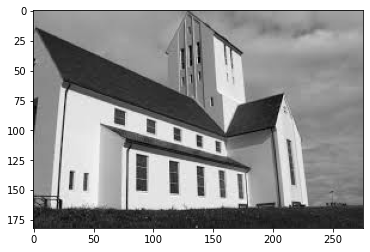

C:\Users\camara\anaconda3\lib\site-packages\matplotlib\image.py:455: RuntimeWarning: overflow encountered in double_scalars
  newmin = vmid - dv * fact
C:\Users\camara\anaconda3\lib\site-packages\matplotlib\image.py:460: RuntimeWarning: overflow encountered in double_scalars
  newmax = vmid + dv * fact


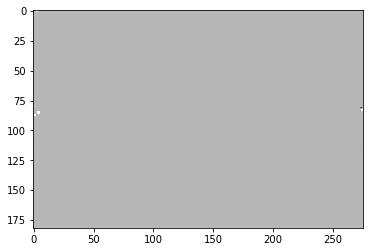

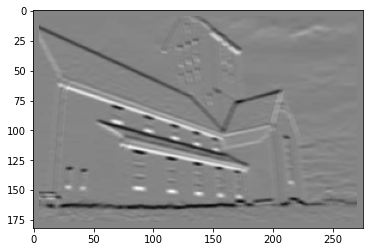

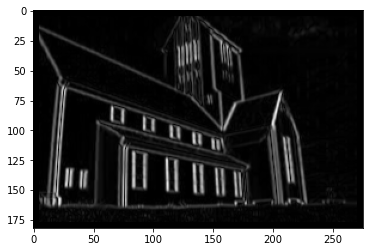

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math

#import and show image
image = Image.open("image1.jfif")
plt.imshow(image, cmap= plt.get_cmap('gray'))
plt.show()
imageArray = np.array(image)

# get Hx and Hy
Hx = np.array([[0.04,0.08,0,-0.08,-0.04],
               [0.16,0.37,0,-0.37,-0.16],
               [0.27,0.61,0,-0.61,-0.27],
               [0.16,0.37,0,-0.37,-0.16],
               [0.04,0.08,0,-0.08,-0.04]])

Hy = np.array([[-0.04,-0.04,-0.04,-0.04,-0.04],
               [-0.08,-0.08,-0.08,-0.08,-0.08],
               [ 0   ,  0,      0,    0,    0],
               [ 0.08, 0.08, 0.08, 0.08, 0.08],
               [0.04,  0.04, 0.04, 0.04, 0.04]])

def setGaussianFilter(sigma, size):
    for i in range(0 - size/2 , size/2 + 1):
        Hx[i] = (1/ (math.sqrt(2* math.pi)*sigma) ^( -i^2/ 2*sigma^2))
        Hy[i] = (1/ (math.sqrt(2* math.pi)*sigma) ^( -i^2/ 2*sigma^2))
            

#compute the gradient  grdient of Image x = Hx * Image
GradientX = np.empty((182, 276))
pixelSum = 0
for i in range(5,imageArray.shape[0] - 5):
    for j in range(5,imageArray.shape[1] - 5):
        for row in range(Hx.shape[0]):
            for col in range(Hx.shape[1]):
                pixelSum += imageArray[i + row][j + col][0] * Hx[row][col]
        GradientX[i][j] = pixelSum
        pixelSum = 0
        
plt.imshow(GradientX, cmap= plt.get_cmap('gray'))
plt.show()

#compute the gradient of image y = hy * Image
GradientY = np.empty((182, 276))
pixelSum = 0
for i in range(5,imageArray.shape[0] - 5):
    for j in range(5,imageArray.shape[1] - 5):
        for row in range(Hy.shape[0]):
            for col in range(Hy.shape[1]):
                pixelSum += imageArray[i + row][j + col][0] * Hy[row][col]
        GradientY[i][j] = pixelSum
        pixelSum = 0
        
        
plt.imshow(GradientY, cmap= plt.get_cmap('gray'))
plt.show()

#compute the magnitude at every pixel
magOfGradient = np.empty((182, 276))
for i in range(5,imageArray.shape[0] - 5):
    for j in range(5,imageArray.shape[1] - 5):
        magOfGradient[i][j] = math.sqrt(GradientX[i][j]**2 + GradientY[i][j]**2)
        
plt.imshow(magOfGradient, cmap= plt.get_cmap('gray'))
plt.show()

#